<h2>Research based on information provided by Agency for Statistics of BiH in "National Health Accounts Statistics 2021".</h2>
<br> Source: https://bhas.gov.ba/data/Publikacije/Saopstenja/2023/NHA_01_2021_Y1_1_BS.pdf

In [4]:
#IMPORTS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>Since we cannot export any of this data from offical website. I had to extract data from report PDF. I've just used ChatGPT and made two prompt with the input of column names from PDF provided by BHAS.</h3>

<br><strong>ChatGPT prompts:</strong>
>From following columns make a python list named "data" <br>
>Remove all Bosnian words from the output

And we're left with clean list ready for further processing.

In [5]:
#Data from PDF in A python list
data = [
    ["HP.1", "Hospitals", "1 173,712", "250,853", "1 424,565"],
    ["HP.2", "Residential long-term care facilities", "0.465", "3.880", "4,345"],
    ["HP.3", "Providers of ambulatory health care", "766,933", "230,652", "997,585"],
    ["HP.4", "Providers of ancillary services", "25,098", "39,404", "64,501"],
    ["HP.5", "Retailers and other providers of medical goods", "399,160", "628,852", "1 028,012"],
    ["HP.6", "Providers of preventive care", "46,562", "0.640", "47,203"],
    ["HP.7", "Providers of health care system administration and financing", "75,349", "6,474", "81,823"],
    ["HP.8", "Rest of the economy", "30,780", "-", "30,780"],
    ["HP.9", "Rest of the world", "61,547", "-", "61,547"],
]

In [6]:
#Columns from a PDF in a python list
columns = ["Code","Providers of health care", "Public expenditure", "Private expenditure", "All financing schemes"]

<h3>In the following section we are going to clean out our data. With next steps: <br></h3>
<ul>
    <li>Replace "-" from dataset with None</li>
    <li>Remove columns that we don't need</li>
    <li>Remove commas and spaces from values</li>
    <li>Convert values to numeric (float)</li>
</ul>

In [7]:
#Set DataFrame
df = pd.DataFrame(data, columns=columns)

In [8]:
# Clean out "-" from dataset and replace it with None value
df = df.replace("-", None)

In [9]:
# ChatGPT gave us these "code" values apart from names which we do not need and will remove
df = df.drop(columns=["Code"])

In [10]:
# Remove commas (,) and spaces( ) from numeric values and convert to float
numeric_columns = ["Public expenditure", "Private expenditure", "All financing schemes"]
df[numeric_columns] = df[numeric_columns].replace({',': ''}, regex=True)
df[numeric_columns] = df[numeric_columns].replace({' ': ''}, regex=True).astype(float)

In [11]:
# Sort the DataFrame based on the "All financing schemes" column in descending order
df_sorted = df.sort_values(by="All financing schemes", ascending=False)

<h2>Important variables</h2>

<h4>Variables that we are going to use for analysis or important conclusions</h4>

In [12]:
#Total Spent
total_spent = sum(df_sorted['All financing schemes'])

# Top 3 Spenders
top_3_spenders = df_sorted.head(3)                                                      # DataFrame made out of only top 3 spenders
top_3_percent_of_total = (sum(top_3_spenders["All financing schemes"])/total_spent)*100 # This is percentage of how much is spent by top 3 in comparison to the total money spent
str_top3_per = '≈' + str(round(top_3_percent_of_total))+'%'                             # This is same as top_3_percent_of_total just rounded and convertet to string with approx. symbol and '%'

#Bottom 3 spenders
bottom_3_spenders = df_sorted.tail(3)

<h2>Visuals</h2>

<h4>Pie Chart showing spread of all resources across each Healthcare provider in Bosnia</h4>

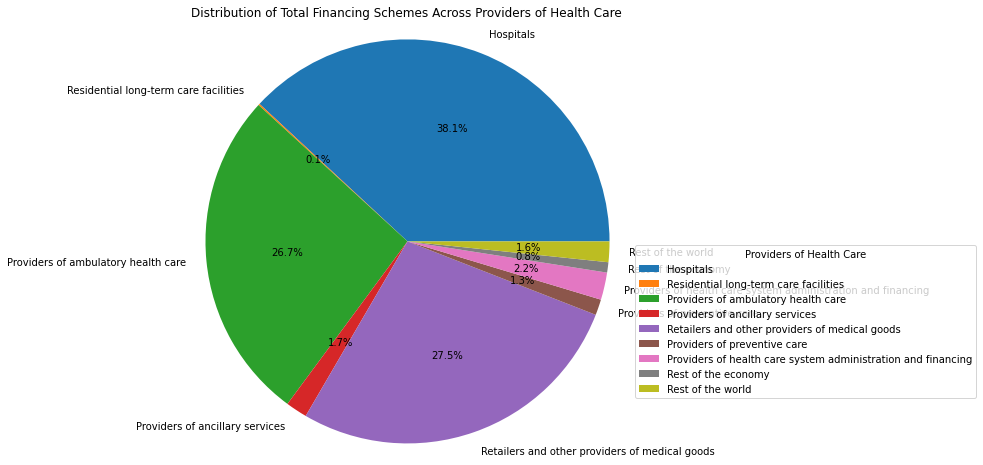

In [13]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df["All financing schemes"], labels=df["Providers of health care"], autopct='%1.1f%%')
# Add a legend with the provider names
plt.legend(df["Providers of health care"], title="Providers of Health Care", loc="best", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Total Financing Schemes Across Providers of Health Care")
plt.axis('equal')
plt.show()

<h4>Bar Chart showing spending comaprison of top 3 spenders</h4>

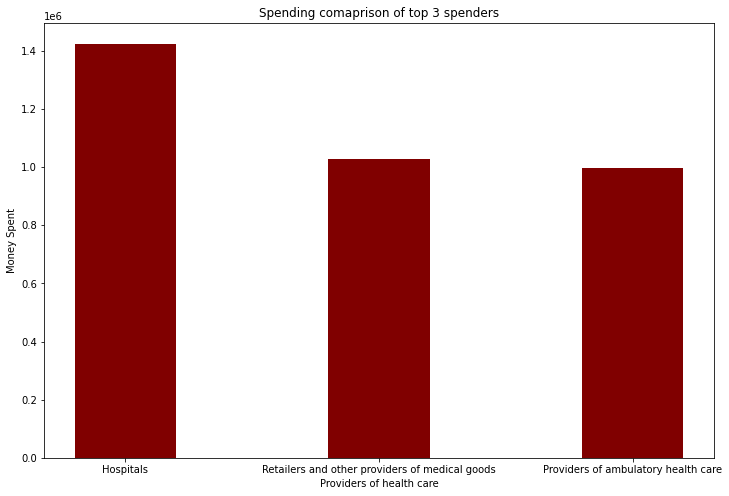

In [14]:
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_3_spenders['Providers of health care'], top_3_spenders['All financing schemes'], color ='maroon',width = 0.4)

plt.xlabel("Providers of health care")
plt.ylabel("Money Spent")
plt.title("Spending comaprison of top 3 spenders")
plt.show()

_______________________<br>
<h2>Totally Spent</h2>

In [15]:
print('Totally spent in 2021: {}'.format(total_spent))

Totally spent in 2021: 3740361.0


_______________________<br>
<h2>Top 1 Spender</h2>

In [16]:
print('Biggest spender is: {}'.format(top_3_spenders['Providers of health care'][0]))

Biggest spender is: Hospitals


_______________________<br>
<h2>Top 3 Spenders</h2>

In [17]:
print('Top 3 spenders are:')
for provider in top_3_spenders['Providers of health care']:
    print(provider)


Top 3 spenders are:
Hospitals
Retailers and other providers of medical goods
Providers of ambulatory health care


_______________________<br>
<h2>Top 3 spenders budget in comparsion to the total budget</h2>

In [18]:
print('Top 3 spenders spent {} of the budget in 2021'.format(str_top3_per))

Top 3 spenders spent ≈92% of the budget in 2021


In [84]:
total_public = 0
for spending in df_sorted['Public expenditure']:
    total_public += spending

In [82]:

total_private = 0
for spending in df_sorted['Private expenditure'].replace(np.NaN,0):
    total_private += spending
total_private = round(total_private)

In [85]:
total_private
total_public

2579141.465

In [91]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x26b1f71c430>,
 [Text(0.6196134833752094, 0.908888954284097, 'private'),
  Text(-0.6196135684715322, -0.9088888962716918, 'public')])

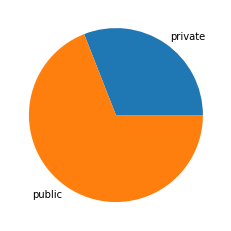

In [92]:
plt.pie([total_private,total_public], labels=['private','public'])